In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
import pandas as pd
import datetime
import seaborn as sns
import json, codecs
import os
# from importnb import Notebook
# with Notebook(): 
#     from CIGRE18_multisim import VAR
# print(VAR)

# Set plot options
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
pt = 1/72.27
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
sns.set_palette(palette1)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

In [2]:
# Current date

today = datetime.date.today()
date = today
directory = ".\\" +  str(date) + "\\"
# KP_P = np.linspace(0,2,11)
# Tp2 = [0, 1]
# Loop over the different loads
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# Loop over the different files
names = []

# names_hyst = []

# VAR = KP_P
# replace_str = "KP_P"
var_path = ".\\" + str(today) + "\\var.json"
# var_path = ".\\" + str(today) + "\\KP_P\\var.json" to do other plots instead of the last one simulated

obj_text = codecs.open(var_path, 'r', encoding='utf-8').read()
VAR = json.loads(obj_text)
var_str = list(VAR.keys())[0]

out_dir = ".\\" + str(today) + "\\" + var_str + "\\"
# Get the parameters
with open(out_dir + 'parameters.json', 'r') as openfile:
    parameters = json.load(openfile)
    

fig_title = var_str + ' variation'
fig_name = var_str + ' variation'
for parameter in parameters:
    fig_title += "; " + parameter + "= " + str(parameters[parameter])
    fig_name += " " + parameter + str(parameters[parameter])
# print(title)

for i,var in enumerate(VAR[var_str]):
    names.append('out_' + var_str + str(i))
    # names_hyst.append('out_hyst' + str(i))

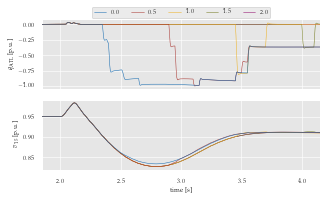

In [5]:
fig,axs = plt.subplots(2,1, figsize = (360*pt,100*2*pt), sharex='col')
# fig.suptitle("\detokenize{"+ fig_title +"}")
fig.subplots_adjust(hspace=0.15, wspace = 0.20)
# axins = zoomed_inset_axes(axs, 3, bbox_to_anchor=[0.7,0.9], bbox_transform=axs.transAxes) # zoom = 2
axs = axs.ravel()
ext1 = []
ext2 = []
# p=[]
z_order = 100
start = 0
cut_end = 0
end = len(VAR[var_str]) - cut_end
for i,var in enumerate(VAR[var_str][start:end]):
    j = i+start
    
    ext=(pyramses.extractor(directory + var_str + "\\" +names[j]+".trj"))
    q= ext.getInj('TL1').Qunit.value
    q+= ext.getInj('TL11').Qunit.value
    q+= ext.getInj('TL15').Qunit.value
    q+= ext.getInj('TL16').Qunit.value
    q+= ext.getInj('TL17').Qunit.value
    q+= ext.getInj('TL18').Qunit.value
    # p= ext.getInj('TL1').Punit.value
    # p+= ext.getInj('TL11').Punit.value
    # p+= ext.getInj('TL15').Punit.value
    # p+= ext.getInj('TL16').Punit.value
    # p+= ext.getInj('TL17').Punit.value
    # p+= ext.getInj('TL18').Punit.value
    
    data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time [s]"])
    # data["$p_\mathrm{ATL}$ [p.u.]"] = ext.getInj('TL1').Punit.value
    # data["$q_\mathrm{ATL}$ [p.u.]"] = q
    # data["$p_\mathrm{ATL}$ [p.u.]"] = p

    # data["$wm_ref$"] = ext1[-1].getInj('TL1').wm_ref_lim.value
    # data["$f$ [Hz]"] = (ext.getSync('G').S.value)*50
    data["$q_\mathrm{ATL}$ [p.u.]"] = ext.getInj('TL1').Qunit.value
    data["$v_{15}$ [p.u.]"] = ext.getBus('N15').mag.value
    # data["$v_{11}$ [p.u.]"] = ext.getBus('N11').mag.value
    # data["$v_{15}$ [p.u.]"] = ext.getBus('N15').mag.value
    # data["$v_{16}$ [p.u.]"] = ext.getBus('N16').mag.value
    # data["$v_{17}$ [p.u.]"] = ext.getBus('N17').mag.value
    # data["$v_{18}$ [p.u.]"] = ext.getBus('N18').mag.value
    # data["$i_P$"] = ext.getInj('TL1').iP.value
    # data["$dQ_sum$"] = ext1[-1].getInj('TL1').dQ_sum.value

#     for i, ax in enumerate(axs):
#         sns.lineplot(ax=ax, y=data.columns[i+1], x="time", data=data,linewidth=0.5, label=round(var,3), zorder = z_order)
# #         ax = sns.lineplot(ax=ax2, y="iP", x="time", data=data,linewidth=0.5, zorder = z_order)
#         ax.set_xlim([1.75,4.75])
#         if i%2 == 1:
#             ax.yaxis.set_label_position("right")
    # sns.lineplot(ax=axs, y=data.columns[1], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axins, y=data.columns[1], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)

    sns.lineplot(ax=axs[0], y=data.columns[1], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    sns.lineplot(ax=axs[1], y=data.columns[2], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[1], y=data.columns[3], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[1], y=data.columns[4], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[1], y=data.columns[5], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[1], y=data.columns[6], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[1], y=data.columns[7], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[2], y=data.columns[3], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    # sns.lineplot(ax=axs[3], y=data.columns[4], x="time [s]", data=data,linewidth=0.5, label=round(var,3), zorder = z_order, legend = False)
    z_order -= 1
# ext=(pyramses.extractor(directory + "droop.trj"))
# p= ext.getInj('TL1').Punit.value
# p+= ext.getInj('TL11').Punit.value
# p+= ext.getInj('TL15').Punit.value
# p+= ext.getInj('TL16').Punit.value
# p+= ext.getInj('TL17').Punit.value
# p+= ext.getInj('TL18').Punit.value
# t=ext.getSync('G').S.time
# f=ext.getSync('G').S.value*50
# sns.lineplot(ax=axs[0], y=p, x=ext.getSync('G').S.time,linewidth=0.5, label='droop', color = 'black', zorder = z_order, legend = False)
# sns.lineplot(ax=axs[1], y=(ext.getSync('G').S.value)*50, x=ext.getSync('G').S.time,linewidth=0.5, label='droop', color = 'black', zorder = z_order, legend = False)
# axs[0].plot(t,p,label="droop")
# axs[1].plot(t,f,label="droop")
# axs[1].yaxis.set_label_position("right")
# axs[3].yaxis.set_label_position("right")
# axs[0].set_xlim([1.85,4.15])
# axs[1].set_yticks([49.5,50.0])
axs[1].set_xlim([1.85,4.15])
# axs[1].set_ylabel("$v$ [p.u.]")

# axins.set_xlim(2.05, 2.35)
# axins.set_ylim(2.3, 2.55)

# mark_inset(axs, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# axins.set_ylabel('')    
# axins.set_xlabel('')
# axs.set_xlim([1.85,4.15])


# fig.align_ylabels(axs[:])    
axs[0].legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.22), ncol=len(VAR[var_str][start:end])+1)
# axs[1].set_yticks([49.5, 50])
# axs.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.12), ncol=len(VAR[var_str][start:end]))

         #     # ext2.append(pyramses.extractor(directory+ "ki_p hyst,kpp1,5\\" + names_hyst[j]+".trj"))
#     # data = pd.DataFrame(data = ext2[-1].getSync('G').S.time, columns=["time"])
#     # data["Punit"] = ext2[-1].getInj('TL1').Punit.value
#     # data["wmref"] = ext2[-1].getInj('TL1').wm_ref_lim.value
#     # data["f"] = ext2[-1].getSync('G').S.value
#         ax = sns.lineplot(ax=ax3, y="dQsum", x="time", data=data,linewidth=0.5, label=round(var,3), zorder = z_order)
#         ax = sns.lineplot(ax=ax4, y="iQ", x="time", data=data,linewidth=0.5, zorder = z_order)
    # If z_order is +=1 the line on top is the last one. If z_order -= 1 it is the first one
i=0
str_i = "" 
while True:
    if not os.path.exists(directory + fig_name + str_i + '.png'):
        fig.savefig(directory + fig_name + str_i + '.png',bbox_inches='tight', dpi = 300)
        break
    else:
        i += 1
        str_i = " " + str(i)    